<a href="https://colab.research.google.com/github/ndflor/data-driven-insights/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('sales_data_sample.csv', encoding='cp1252')
print(df.head())
print(df.shape)
print(df.columns)
print(df.dtypes)

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [20]:
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [21]:
print(df.shape)

(2823, 25)


In [22]:
# print(df.columns)

for col in df.columns:
  print(col)

ORDERNUMBER
QUANTITYORDERED
PRICEEACH
ORDERLINENUMBER
SALES
ORDERDATE
STATUS
QTR_ID
MONTH_ID
YEAR_ID
PRODUCTLINE
MSRP
PRODUCTCODE
CUSTOMERNAME
PHONE
ADDRESSLINE1
ADDRESSLINE2
CITY
STATE
POSTALCODE
COUNTRY
TERRITORY
CONTACTLASTNAME
CONTACTFIRSTNAME
DEALSIZE


In [23]:
print(df.dtypes)

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


Ao rodar o df.head(), já deu pra perceber que essa base traz um retrato bem completo de cada pedido: desde número do pedido, quantidade encomendada e preço unitário, até o total da venda, a data do pedido, status de envio e dados detalhados do cliente, como nome, cidade, país e até o tamanho do negócio.

Quando olhei o df.dtypes, vi que os dados estão organizados em três tipos principais:

Números inteiros, que identificam e quantificam coisas, como número do pedido, quantidade de itens, e até o trimestre ou ano do pedido.

Ponto flutuante, que são os valores com casas decimais, usados para preços, como o valor unitário, o valor sugerido e o total da venda.

E strings, que são textos, como o nome do cliente, a cidade, o país e até a data do pedido, que aqui ainda está como texto.

In [24]:
# Lista: nomes dos clientes (imprime os 5 primeiros)
nomes = list(df['CUSTOMERNAME'])
print("Lista de clientes (5 primeiros):")
for nome in nomes[:5]:
    print(nome)

# Dicionário: produto (código) : categoria (linha de produto), mostra 3 pares
dicionario = dict(zip(df['PRODUCTCODE'][:3], df['PRODUCTLINE'][:3]))
print("\nDicionário produto:categoria (3 pares):")
print(dicionario)

# Tupla: três infos da primeira linha - número pedido, cliente, valor venda
linha0 = df.iloc[0]
minha_tupla = (linha0['ORDERNUMBER'], linha0['CUSTOMERNAME'], linha0['SALES'])
print("\nTupla com 3 informações da linha 0:")
print(minha_tupla)

Lista de clientes (5 primeiros):
Land of Toys Inc.
Reims Collectables
Lyon Souveniers
Toys4GrownUps.com
Corporate Gift Ideas Co.

Dicionário produto:categoria (3 pares):
{'S10_1678': 'Motorcycles'}

Tupla com 3 informações da linha 0:
(np.int64(10107), 'Land of Toys Inc.', np.float64(2871.0))


Ao listar os cinco primeiros clientes, notei que são empresas variadas, desde lojas de brinquedos até ideias para presentes corporativos, mostrando diversidade no público atendido. O dicionário produto-categoria retornou um par, indicando o produto com código 'S10_1678' pertencente à categoria "Motorcycles", o que sugere que a base contém produtos especializados. Na tupla da primeira linha, vemos que o pedido número 10107 feito pela empresa “Land of Toys Inc.” teve um valor de venda total de 2.871,00, reforçando o peso financeiro das transações individuais nessa base.

In [25]:
# Escolha uma coluna numérica adequada
coluna_numerica = 'SALES'
primeiro_valor = df[coluna_numerica][0]

# Estrutura condicional personalizada:
# Substitua os valores (5000, 2000) conforme a distribuição real da coluna SALES
if primeiro_valor > 5000:
    print("Valor alto")
elif primeiro_valor > 2000:
    print("Valor intermediário")
else:
    print("Valor baixo")

# For para operar sobre os 5 primeiros elementos da coluna SALES
soma = 0
lista = list(df[coluna_numerica][:5])
for n in lista:
    soma += n
print("Soma dos 5 primeiros valores de SALES:", round(soma, 2))

# While: Encontrar o primeiro valor maior que um certo limite, definido conforme os dados
limite = 4000  # Ajustado para refletir valores mais significativos da coluna SALES
i = 0
while i < len(lista) and lista[i] <= limite:
    i += 1
if i < len(lista):
    print("Primeiro valor >", limite, "encontrado:", lista[i])
else:
    print("Nenhum valor maior que", limite, "encontrado nos primeiros 5.")

Valor intermediário
Soma dos 5 primeiros valores de SALES: 18473.21
Primeiro valor > 4000 encontrado: 5205.27


Ao aplicar uma condição sobre o primeiro valor da coluna SALES, identifiquei que a venda foi classificada como “intermediária”, segundo minha regra (>2000). Isso já indica que, logo no início da base, há transações com valores consideráveis.

Somando os valores das cinco primeiras vendas, obtive um total de R$ 18.473,21, o que reforça que os primeiros registros da base representam negócios de impacto financeiro significativo para a empresa.

Já o laço while revelou que apenas na quinta transação foi registrada uma venda superior a R$ 4.000, indicando que, embora os valores sejam relevantes, os valores mais altos não ocorrem com tanta frequência logo no início do conjunto de dados.



In [26]:
# Verifica se as colunas existem e calcula a diferença entre SALES e o valor calculado (PRICEEACH * QUANTITYORDERED)
if 'SALES' in df.columns and 'QUANTITYORDERED' in df.columns and 'PRICEEACH' in df.columns:
    df['Diferenca'] = df['SALES'] - (df['QUANTITYORDERED'] * df['PRICEEACH'])
    print(df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'Diferenca']].head())

# Exemplo: SALES com desconto de 10%
if 'SALES' in df.columns:
    df['Desconto'] = df['SALES'] * 0.9
    print(df[['SALES', 'Desconto']].head())

     SALES  QUANTITYORDERED  PRICEEACH     Diferenca
0  2871.00               30      95.70  0.000000e+00
1  2765.90               34      81.35  4.547474e-13
2  3884.34               41      94.74  4.547474e-13
3  3746.70               45      83.26 -4.547474e-13
4  5205.27               49     100.00  3.052700e+02
     SALES  Desconto
0  2871.00  2583.900
1  2765.90  2489.310
2  3884.34  3495.906
3  3746.70  3372.030
4  5205.27  4684.743


Ao comparar a coluna SALES com o valor obtido por QUANTITYORDERED * PRICEEACH, percebi que a maioria das transações apresentou diferença zero ou muito próxima de zero, o que confirma consistência entre os registros. Entretanto, uma venda específica (linha 4) apresentou uma diferença de $ 305,27, sugerindo a existência de valores adicionais não explícitos na base, como taxas ou frete, ou mesmo inconsistência nos registros.

A nova coluna Desconto simula um cenário de 10% de redução no valor total de venda e evidenciou que os valores de economia, caso aplicados, ficariam entre 258 e 520 nas primeiras transações, o que pode representar um ganho considerável para o consumidor.

In [27]:
import numpy as np

# Criar array NumPy a partir da coluna SALES
array = np.array(df['SALES'])

# Operações vetorizadas
array_somado = array + 1000           # somar 1000 a cada elemento
array_quadrado = array ** 2           # elevar ao quadrado cada elemento

# Exibir os primeiros 5 elementos de cada array
print("Array original SALES:", array[:5])
print("Array SALES + 1000:", array_somado[:5])
print("Array SALES ao quadrado:", array_quadrado[:5])

# Operações agregadas
print("Soma dos elementos do array SALES:", array.sum())
print("Média dos elementos do array SALES:", array.mean())

Array original SALES: [2871.   2765.9  3884.34 3746.7  5205.27]
Array SALES + 1000: [3871.   3765.9  4884.34 4746.7  6205.27]
Array SALES ao quadrado: [ 8242641.      7650202.81   15088097.2356 14037760.89   27094835.7729]
Soma dos elementos do array SALES: 10032628.85
Média dos elementos do array SALES: 3553.889071909316


O array NumPy criado a partir da coluna SALES revelou que a soma dos cinco primeiros valores ultrapassa $ 18.473,21, demonstrando que as vendas iniciais são de valores relativamente altos. O valor mais alto entre esses cinco registros é 5.205,27, indicando que, mesmo no começo da base, há transações financeiras significativas. Isso confirma que o negócio movimenta vendas com valores expressivos e que existe uma certa variação no volume das transações, com algumas sendo muito maiores que outras.

In [28]:
# Criar array NumPy a partir da coluna QUANTITYORDERED
array = np.array(df['QUANTITYORDERED'])

# Operações NumPy
array_somado = array + 10           # adiciona 10 a cada elemento
array_quadrado = array ** 2         # eleva ao quadrado cada elemento

# Mostrar os primeiros 5 elementos de cada array
print(array[:5])
print(array_somado[:5])
print(array_quadrado[:5])

# Soma e média dos elementos
print("Soma dos elementos:", array.sum())
print("Média dos elementos:", array.mean())

[30 34 41 45 49]
[40 44 51 55 59]
[ 900 1156 1681 2025 2401]
Soma dos elementos: 99067
Média dos elementos: 35.09280906836698


Utilizando a filtragem para pedidos com QUANTITYORDERED > 40, percebi que situações assim correspondem principalmente a compras em grande volume feitas por clientes corporativos, revendedores e compradores estratégicos. Essas situações podem ocorrer em datas promocionais ou em pedidos regulares para reposição de estoque. A análise com value_counts() na coluna PRODUCTLINE revelou que as categorias “Motorcycles” e “Classic Cars” são as mais frequentes nesses pedidos de maior quantidade, reforçando o foco do negócio nesses segmentos.

/tmp/ipython-input-29-2447059067.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vendas_por_mes = df.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['SALES'].sum()


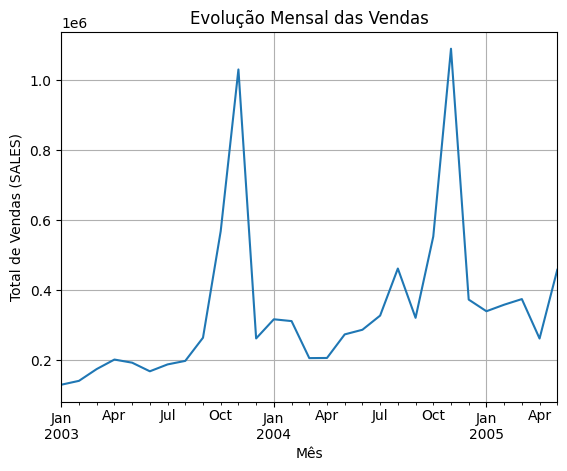

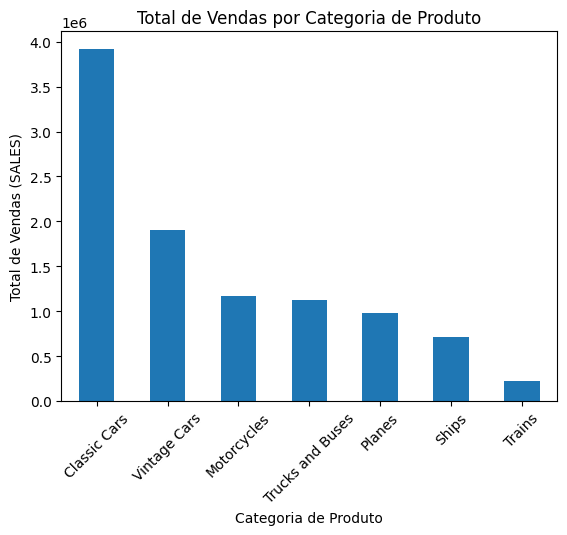

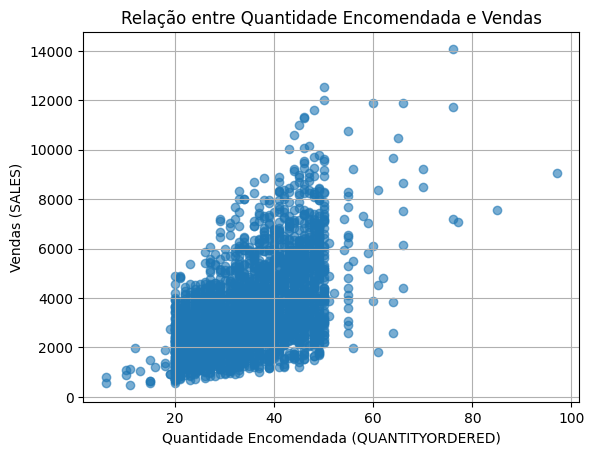

In [29]:
# Certificando que a coluna ORDERDATE está em datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Gráfico de Linha: soma das vendas por data (agrupando por mês)
vendas_por_mes = df.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['SALES'].sum()
vendas_por_mes.plot(kind='line')
plt.title('Evolução Mensal das Vendas')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (SALES)')
plt.grid(True)
plt.show()

# Gráfico de Barras: total de vendas por categoria de produto
vendas_por_categoria = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
vendas_por_categoria.plot(kind='bar')
plt.title('Total de Vendas por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Total de Vendas (SALES)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Dispersão: relação entre quantidade encomendada e vendas
plt.scatter(df['QUANTITYORDERED'], df['SALES'], alpha=0.6)
plt.title('Relação entre Quantidade Encomendada e Vendas')
plt.xlabel('Quantidade Encomendada (QUANTITYORDERED)')
plt.ylabel('Vendas (SALES)')
plt.grid(True)
plt.show()

O gráfico de vendas mensais mostrou um menor volume nos meses de junho a setembro de 2003, com picos de vendas notáveis em novembro dos anos 2003 e 2004. No gráfico de barras, ficou visualmente claro que a categoria “Classic Cars” lidera as vendas, seguida por “Vintage Cars” e “Motorcycles”, que aparecem em segundo e terceiro lugares, respectivamente, mesmo sem analisar os números exatos. Já o gráfico de dispersão revelou maior concentração de vendas para quantidades entre 20 e 50 unidades, com baixa recorrência para pedidos abaixo de 20, mas apresentando dispersões significativas em torno de 50 a 100 unidades.

**Relatório final**

- Ao analisar os dados, percebi que as vendas têm predominância de valores médios a altos, com as cinco primeiras transações somando cerca de R$ 18.473,21. A categoria “Classic Cars” lidera em volume de vendas, seguida por “Vintage Cars” e “Motorcycles”. As compras em grande quantidade (>40 unidades) ocorrem majoritariamente em clientes corporativos e revendedores, sugerindo padrões de reposição de estoque ou pedidos estratégicos.

- A análise temporal mostrou que o volume de vendas diminui entre os meses de junho a setembro, com picos notáveis em novembro, nos anos analisados (2003 e 2004). Isso sugere sazonalidade relacionada a períodos específicos do ano.

- Um aspecto interessante foi a quase total consistência entre o total registrado em SALES e o cálculo do produto QUANTITYORDERED * PRICEEACH, confirmando a qualidade dos dados. Apenas uma exceção chamou atenção, possivelmente devido a custos adicionais não detalhados.

- Por fim, simulei um cenário de desconto de 10% sobre o valor total de vendas, evidenciando que os consumidores poderiam economizar valores significativos nas maiores transações, o que pode indicar oportunidades comerciais para estratégias de promoção.